In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
movies_rating = pd.read_csv("/content/Movie dataset.csv", encoding='latin1')
movies_rating

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(movies_rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [ ]:
print(movies_rating.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [ ]:
print(movies_rating.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
movies_rating['Year'] = pd.to_numeric(movies_rating['Year'], errors='coerce')
movies_rating['Duration'] = pd.to_numeric(movies_rating['Duration'], errors='coerce')
movies_rating['Votes'] = pd.to_numeric(movies_rating['Votes'].str.replace(',', ''), errors='coerce')

In [ ]:
movies_rating.fillna({
    'Genre': 'Unknown',
    'Director': 'Unknown',
    'Actor 1': 'Unknown',
    'Actor 2': 'Unknown',
    'Actor 3': 'Unknown',
    'Rating': movies_rating['Rating'].mean(),
    'Year': movies_rating['Year'].mean(),
    'Duration': movies_rating['Duration'].mean(),
    'Votes': movies_rating['Votes'].mean()
}, inplace=True)

In [ ]:
movies_rating['Actors'] = movies_rating['Actor 1'] + ', ' + movies_rating['Actor 2'] + ', ' +movies_rating['Actor 3']

In [ ]:
movies_rating = movies_rating.drop(['Name', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)

In [ ]:
X = movies_rating.drop('Rating', axis=1)
y = movies_rating['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = ['Genre', 'Director', 'Actors']
numeric_features = ['Year', 'Duration', 'Votes']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

In [ ]:
imputer = SimpleImputer(strategy='mean') # Define the imputer

linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', imputer), # Add imputation step to the pipeline
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [16447 16448]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actors']),
                                                 ('num', StandardScaler(),
                                                  ['Year', 'Duration',
                                                   'Votes'])])),
                ('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [ ]:
linear = linear_model.predict(X_test)
linear

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [16447 16448]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([5.98265808, 5.66993823, 5.90850844, ..., 5.91486973, 5.36802046,
       5.83713562])

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Model Performance:')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}\n')

evaluate_model(y_test, linear, 'Linear Regression')

Linear Regression Model Performance:
Mean Squared Error: 1.2988824718772358
R2 Score: -0.3495200071283606



In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': linear
})

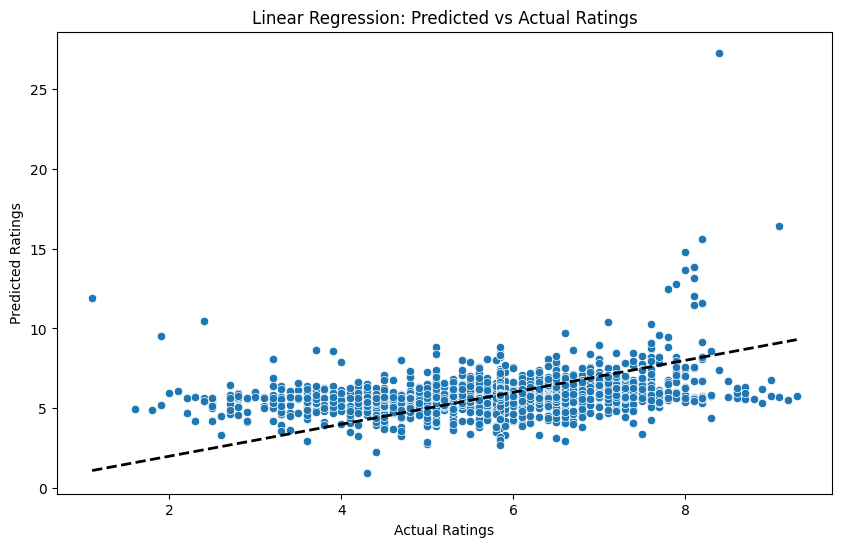

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression: Predicted vs Actual Ratings')
plt.show()